# DANDI 001276: NG-CANCAN Electroporation Dataset Exploration

---

**IMPORTANT**: This notebook was **AI-generated using *dandi-notebook-gen*** and **not fully verified**. Interpret results and analyses with caution.

---

## Introduction

**DANDI ID**: 001276  
**Title**: NG-CANCAN Remote Targeting Electroporation: Impact of Burst Number Variation on Permeabilization Distribution in Confluent Cell Monolayers  

**Description**:  
Experiments conducted using a four-electrode array focused on optimizing the CANCAN protocol's effect on cell monolayers. The goal was to understand how varying pulse bursts influence membrane permeabilization, while minimizing damage. The data includes microscopy images with fluorescent stains (Hoechst, YoPro-1) reflecting cell viability and permeability.

**Contributors**:  
Silkuniene, Giedre; Silkunas, Mantas; National Institutes of Heath; Pakhomov, Andrei

**License**: CC-BY-4.0  
**Citation**: Silkuniene, Giedre; et al. (2025) DANDI Archive. https://dandiarchive.org/dandiset/001276  
**Institution**: Old Dominion University, Pakhomov Lab

This notebook demonstrates how to explore assets, load NWB files, access imaging data, and run basic analyses.

## Requirements

This notebook requires the following Python packages:
- `pynwb`
- `remfile`
- `h5py`
- `numpy`
- `matplotlib`
- `dandi`

These should be installed in your environment.

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001276")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets.")
print("First few asset paths:")
for asset in assets[:5]:
    print(asset.path)

Found 108 assets.
First few asset paths:
sub-P1-20240627-A2/sub-P1-20240627-A2_obj-fniblx_image.nwb
sub-P1-20240627-A3/sub-P1-20240627-A3_obj-1h4rh2m_image.nwb
sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb
sub-P1-20240627-A3/sub-P1-20240627-A3_obj-k9o87l_image.nwb
sub-P1-20240627-B1/sub-P1-20240627-B1_obj-1qpzwid_image.nwb


## Load an NWB file and visualize a central crop of imaging data

Here, we demonstrate how to access one NWB file, extract key metadata, and visualize a central crop of the primary acquisition image.

*For demonstration, a single file was chosen:*

```
sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb
```

Loading NWB file from URL...


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session start time: 2024-12-12 14:41:58.197201-05:00
Identifier: 441cb2b5-170d-4539-8f1f-731a5d1b3759
Lab: Pakhomov Lab
Institution: Old Dominion University
Subject ID: P1_20240627_A2
Species: http://purl.obolibrary.org/obo/NCBITaxon_10090


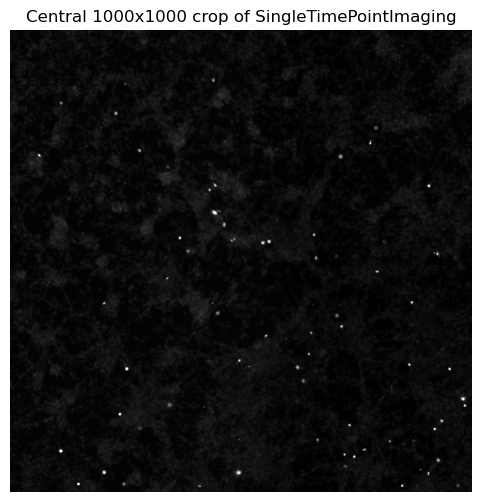

In [2]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np

url = "https://api.dandiarchive.org/api/assets/95141d7a-82aa-4552-940a-1438a430a0d7/download/"

print("Loading NWB file from URL...")
file = remfile.File(url)
f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=f, load_namespaces=True)
nwb = io.read()

# Extract metadata
print(f"Session start time: {nwb.session_start_time}")
print(f"Identifier: {nwb.identifier}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")

# Access imaging data
data = nwb.acquisition["SingleTimePointImaging"].data  # shape (1, 19190, 19190)
img = data[0]  # The full uint16 image

center_x, center_y = img.shape[0] // 2, img.shape[1] // 2
crop_size = 1000
half_crop = crop_size // 2
crop = img[center_x - half_crop:center_x + half_crop, center_y - half_crop:center_y + half_crop]

plt.figure(figsize=(6,6))
plt.imshow(crop, cmap="gray")
plt.title("Central 1000x1000 crop of SingleTimePointImaging")
plt.axis("off")
plt.show()

The figure above displays a central crop of the microscope image.
The dataset consists of single-frame fluorescence microscopy images related to electroporation conditions.
The sparse bright puncta visible here may relate to cellular elements or labels, but further analysis would be required.
This example illustrates how to load and visualize image data stored within NWB files in this Dandiset.

---

## Summary

In this notebook, we've shown how to:

- Access DANDI Dandisets programmatically
- Inspect metadata and assets
- Load NWB imaging files remotely via `remfile` and `pynwb`
- Visualize imaging data with basic cropping for convenience

Moving forward, exploration can be expanded to analyze different files, extract quantitative features, or apply computational methods tailored to specific experimental questions.

**Again, be aware that this is an AI-generated exploratory template and results/visualizations should be critically evaluated.**